<a href="https://colab.research.google.com/github/SofiaPenyaGonzalez/TRABAJOS/blob/main/PR%C3%81CTICA_FINAL_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 2**

María García Rodríguez

Paloma Moya Tudela

Sofía Peña González

Elena Peral Pastor



# RESUMEN

# ÍNDICE



*   Introducción
*   Datos
*   Métodos
*   Resolución
*   Hallazgos
*   Trabajo futuro
*   Referencias Bibliográficas







# INTRODUCCIÓN


En este documento se va a construir una RNA de un modelo de predicción del precio medio de las reservas de hoteles. Debido a estas características hemos optado por un método de regresión. 

La "regresión", consiste en predecir un valor continuo de una etiqueta discreta. 

Es posible abordar este problema desde varias perspectivas. Un problema interante sería utilizar Clasificación Binaria con el fin de averiguar la cancelación o no de una reserva . Por otro lado, se puede emplear el método de regresión para calcular el posible precio de un reserva con determinadas caracterísiticas. 


Un documento relacionado con este proyecto es el visto en clase: Regresión de Precio de Casas. 




# DATOS

Trabajaremos con un conjunto de datos acerca de las reservas en hoteles, con el objetivo de adquirir la capacidad de predicción de una cancelación de reserva. 

Fichero CSV de 36.276 filas y 19 columnas. La información que aporta cada columna se explica a continuación:

1. **Booking_ID**: identificador único de cada reserva
2. **no_of_adults**: cantidad de adultos
3. **no_of_children**: cantidad de niños
4. **no_of_weekend_nights**: cantidad de noches en fin de semana (sábado o domingo) que los huéspedes se quedaron, o reservaron, para permanecer en el hotel
5. **no_of_week_nights**: cantidad de noches en semana (lunes a viernes) que los huéspedes se quedaron, o reservaron, para permanecer en el hotel
6. **type_of_meal_plan**: tipo de plan de comida reservado por el cliente
7. **required_car_parking_space**: ¿Requiere el cliente una plaza de aparcamiento? (0 - No, 1- Sí)
8. **room_type_reserved**: tipo de habitación reservada por el cliente. Los valores están codificados por 'INN Hotels'.
9. **lead_time**:cantidad de días entre la fecha de reserva y la fecha de llegada
10. **arrival_year**: año de la fecha de llegada
11. **arrival_month**: mes de la fecha de llegada
12. **arrival_date**: fecha del mes
13. **market_segment_type**: designación del segmento de mercado
14. **repeated_guest**: ¿El cliente es un huésped reincidente? (0 - No, 1- Sí)
15. **no_of_previous_cancellations**: cantidad de reservas previas que fueron canceladas por el cliente, previo a la reserva actual
16. **no_of_previous_bookings_not_canceled**: cantidad de reservas previas que no fueron canceladas por el cliente, previo a la reserva actual
17. **avg_price_per_room**: precio medio de la reserva por día; los precios de las habitaciones son dinámicas (en euros)
18. **no_of_special_requests**: cantidad total de solicitudes presentadas por el cliente (p.e. vistas de la habitación, planta elevada, ...)
19. **booking_status**: señal indicadora de si la reserva fue cancelada o no

Observamos que aparecen diferentes tipos de datos en las columnas; ya sean cadenas de caracteres, dígitos binarios, discretos o continuos. Asimismo, no existen valores vacíos ("missing values"), característica que nos permitirá saltarnos la correspondiente limpieza en la base de datos de estas celdas. 

`Pandas` soporta un amplio catálogo de formatos: **CSV, TSV, JSON, HTML, Parquet, HDF5...**. Debido a que estos datos sobre reservas de hoteles están almacenados en un fichero **CSV**, será necesario utilizar la función `read_csv` de la biblioteca Pandas para importar dicha base de datos.

# MÉTODOS

Los métodos y todas las herramientas utilizadas serán explicadas a lo largo de este documento al igual que la Preparación de los Datos y los hallazgos. 

# RESOLUCIÓN

## Importación de la base de datos

In [1]:
# CARGAMOS EL CONJUNTO DE DATOS EN KERAS
import pandas as pd
datos = pd.read_csv('Hotel Reservations.csv')
datos.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Hemos utilizado los valores que venían por defecto, para todos sus parámetros. Sin embargo, Pandas nos permite:

* Seleccionar el carácter separador, que podría ser la 'coma' en el caso de nuestra base de datos (debido al formato en el que se descargó el archivo)
* Determinar diferentes valores que deben considerar como True y False: las columnas con carácter binario podrían ser sustituidas de manera que 1-True y 0-False, por ejemplo. Dependerá de las facilidades que aporte al trabajo que se va a realizar.
* Seleccionar una codificación concreta del fichero.
* Indicar manualmente el nombre de las columnas si el fichero no tiene cabecera. Igualmente, este cambio se puede llevar cabo en el caso de querer reemplazar el nombre actual de las mismas por otro deseado.

Debido a que el archivo seleccionado se encuentra redactado en inglés, haremos uso de esta última posibilidad y se modificarán los nombres de las 19 columnas de la base de datos a continuación.

In [2]:
datos.columns = ['IDReserva','Nadultos','Nninos','NochesFinde','NochesSemana','PlanComida','Parking', 'TipoHabitacion','Salida','Llegadaano','Llegadames','Llegadadia','Mercado','NuevooNo','CancelacionesPrev','ReservasNoCancel','PrecioporHab','Complementos','EstadoReserva']
datos

,IDReserva,Nadultos,Nninos,NochesFinde,NochesSemana,PlanComida,Parking,TipoHabitacion,Salida,Llegadaano,Llegadames,Llegadadia,Mercado,NuevooNo,CancelacionesPrev,ReservasNoCancel,PrecioporHab,Complementos,EstadoReserva
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Sin ninguna modificación de los datos, el conjunto inicial está caracteriado por 36275 observaciones (filas) y 19 clases (columnas).

A continuación, utilizaremos herramientas de la ingeniería de características para tener un set viable para el modelo que construiremos posteriormente. 

Comenzamos con la eliminación de los datos NaN.



In [3]:
datos=datos.dropna()
def check_NaN(datos):
  return 'There is no NaN value in this dataset.' if datos.isnull().sum().sum() == 0 else 'There is NaN value in this dataset.'

print(check_NaN(datos))

There is no NaN value in this dataset.


Una vez eliminados los datos que pueden dar problemas al modelo, eliminamos aquellas clases que no sean numéricas, ya que no son necesarias en este estudio.

In [4]:
datos=datos.drop(['IDReserva'],axis=1)
datos=datos.drop(['PlanComida'],axis=1)
datos=datos.drop(['TipoHabitacion'],axis=1)
datos=datos.drop(['Mercado'],axis=1)
datos=datos.drop(['EstadoReserva'],axis=1)

Una vez extraídos, vemos que la nueva dimensión es de 14 clases y las mismas observaciones.

In [5]:
datos.shape

(36275, 14)

In [6]:
datos.head()

,Nadultos,Nninos,NochesFinde,NochesSemana,Parking,Salida,Llegadaano,Llegadames,Llegadadia,NuevooNo,CancelacionesPrev,ReservasNoCancel,PrecioporHab,Complementos
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


En el siguiente código se verá el tipo de variables que caracterizan las clases. En la Preparación de los Datos lo formatearemos en función al método a utilizar, en este caso, un Problema de Regresión.

In [7]:
datos.dtypes

Nadultos               int64
Nninos                 int64
NochesFinde            int64
NochesSemana           int64
Parking                int64
Salida                 int64
Llegadaano             int64
Llegadames             int64
Llegadadia             int64
NuevooNo               int64
CancelacionesPrev      int64
ReservasNoCancel       int64
PrecioporHab         float64
Complementos           int64
dtype: object

In [8]:
datos.loc[8756]

Nadultos                2.0
Nninos                  0.0
NochesFinde             0.0
NochesSemana            2.0
Parking                 0.0
Salida                256.0
Llegadaano           2018.0
Llegadames              6.0
Llegadadia             15.0
NuevooNo                0.0
CancelacionesPrev       0.0
ReservasNoCancel        0.0
PrecioporHab          115.0
Complementos            1.0
Name: 8756, dtype: float64

## Preparación de los datos

Los objetivos (etiquetas) son los valores medios del precio de hotel:

En el siguiente código mostraremos la longitud de la etiqueta que debe de coincidir con lo visto antes.

In [9]:
targets = datos.PrecioporHab
len(targets)

36275

Hacemos las particiones de los datos de la siguiente manera:

In [10]:
train_datos = datos[:25000]
test_datos = datos[25001:]

train_targets = targets[:25000]
test_targets = targets[25001:]

Por un lado se tienen datos de entrenamiento y por otro los datos de prueba que utilizaremos para evaluar cuando el modelo ha sido entrenado. 

La partición ha sido realizada acorde a una relación aproximada de 2/3 para los datos de entrenamiento y de 1/3 para los datos de prueba.

A continuación, por ser un modelo de regresión normalizamos el set de datos con la media y la desviación típica para que los datos comprendan entre 0 y 1 y se obtenga una desviación estándar unitaria.

In [11]:
mean = train_datos.mean(axis=0)
print("##### Media de las 8 características de los datos de entrenamiento ##### ")
print(mean)
train_datos -= mean
std = train_datos.std(axis=0)
print("##### Desviación estandar de las 8 características de los datos de entrenamiento ##### ")
print(std)
train_datos /= std
test_datos -= mean
test_datos /= std

##### Media de las 8 características de los datos de entrenamiento ##### 
Nadultos                1.846440
Nninos                  0.105360
NochesFinde             0.810800
NochesSemana            2.206600
Parking                 0.031560
Salida                 85.354360
Llegadaano           2017.822840
Llegadames              7.426080
Llegadadia             15.564360
NuevooNo                0.025600
CancelacionesPrev       0.022280
ReservasNoCancel        0.154160
PrecioporHab          103.517931
Complementos            0.624520
dtype: float64
##### Desviación estandar de las 8 características de los datos de entrenamiento ##### 
Nadultos              0.518835
Nninos                0.406185
NochesFinde           0.870858
NochesSemana          1.407976
Parking               0.174829
Salida               86.004648
Llegadaano            0.381812
Llegadames            3.066234
Llegadadia            8.733253
NuevooNo              0.157942
CancelacionesPrev     0.350126
ReservasNoCancel    

## DISEÑO, ENTRENAMIENTO Y TEST DE UN SISTEMA DE REDES DE NEURONAS ARTIFICIALES

**Importación de bibliotecas**


In [12]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

from keras import models
from keras import layers

import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


## CREACIÓN DEL MODELO

Al ser un ejercicio de regresión, hacemos uso de la función de pérdida MSE (Mean Squared Error) como Función de Pérdida y MAE (Mean Absolute Error) como métrica que será explicado posteriormente.

Hemos optado por una capa de entrada de 64 neuronas, una capa intermedia de 64 y una última capa sin Función de Activación, por ser un modelo de regresión ya que limitaría el rango que puede tomar la salida.


La última capa tiene una única neurona pues es puramente lineal, la red es libre de aprender a predecir valores en cualquier rango.


In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_datos.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
# MSE: Mean Squared Error
# MAE: Mean Absolute Error
model.compile(optimizer='rmsprop', loss='mse', 
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

Para la variación de los datos de entrenamiento del modelo utilizamos el model.fit() (hold-out). 

La partición es de forma que se destinen 1/3 de los datos de entrenamiento para la validación.

In [14]:
# 1. Hacer aquí las particiones de los datos de entrenamiento
partial_train_datos = train_datos[:18000]
partial_eval_train_datos = train_datos[18001:]
partial_train_targets = train_targets[:18000]
partial_eval_train_targets = train_targets[18001:]

In [15]:
history = model.fit(partial_train_datos, partial_train_targets,
            validation_data=(partial_eval_train_datos, partial_eval_train_targets),
                        epochs=100, batch_size=64)

Epoch 1/100
282/282 [==============================] - 2s 3ms/step - loss: 5301.6245 - mean_absolute_error: 59.5356 - val_loss: 276.1052 - val_mean_absolute_error: 12.7407
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 162.8808 - mean_absolute_error: 8.8026 - val_loss: 87.1637 - val_mean_absolute_error: 6.4366
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 66.3994 - mean_absolute_error: 5.1880 - val_loss: 41.1161 - val_mean_absolute_error: 4.1576
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 33.5021 - mean_absolute_error: 3.3032 - val_loss: 21.8450 - val_mean_absolute_error: 2.5972
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 16.8908 - mean_absolute_error: 2.0526 - val_loss: 9.8337 - val_mean_absolute_error: 1.6430
Epoch 6/100
282/282 [==============================] - 1s 3ms/step - loss: 7.1778 - mean_absolute_error: 1.3523 - val_loss: 4.6474 - val_mean_absolute_error: 1.

Hemos probado con los siguientes Hiperparámetros:

* epochs=100
* batch_size=64

En las siguientes gráficas se mostrarán tanto la pérdida como la precisión de los datos de entrenamiento y validación. 

In [16]:
mae_history = history.history['val_mean_absolute_error']

In [17]:
mse_history = history.history['val_loss']


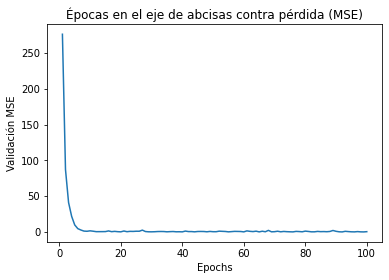

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.title('Épocas en el eje de abcisas contra pérdida (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

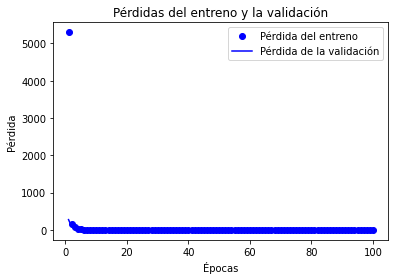

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Pérdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

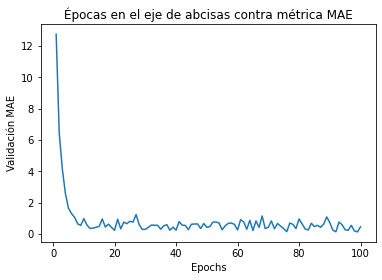

In [20]:
# 4. Confrontar en una gráfica de épocas en el eje de abcisas contra la métrica de 
# error absoluto medio (MAE) 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Épocas en el eje de abcisas contra métrica MAE')
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

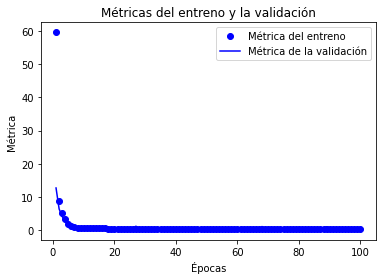

In [21]:
# Por último se realiza una gráfica para comparar el mae de entreno y validación

import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Métrica del entreno')
plt.plot(epochs, val_loss, 'b', label='Métrica de la validación')
plt.title('Métricas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Métrica')
plt.legend()

plt.show()

Tras el análisis de la gráficas se concluye que con 100 épocas de un batch size de 1 se 64 se produce sobreentrenamiento a partir de la décima.

Por ellos, tras varios intentos de prueba y error hemos concluido que los Hiperparámetros serán de la siguiente manera:

* epochs=10
* batch_size=64

Con esto hemos conseguido evitar el Sobreentrenamiento, puesto que con un número elevado de épocas se producen pruebas de generalización entre los datos de entrenamiento y los de validación y se produce Overfitting. 

Por otro lado, hemos mantenido el número de lotes ya que hemos comprobado que esto no afecta a nuestro modelo y para así ver más claramente ver cómo afectaba el número de épocas al entrenamiento. 

In [22]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu',
                       input_shape=(train_datos.shape[1],)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(1))
model1.compile(optimizer='rmsprop', loss='mse', 
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [23]:
# 1. Hacer aquí las particiones de los datos de entrenamiento
partial_train_datos = train_datos[:18000]
partial_eval_train_datos = train_datos[18001:]
partial_train_targets = train_targets[:18000]
partial_eval_train_targets = train_targets[18001:]

In [24]:
history = model1.fit(partial_train_datos, partial_train_targets,
            validation_data=(partial_eval_train_datos, partial_eval_train_targets),
                        epochs=10, batch_size=64)

Epoch 1/10
282/282 [==============================] - 3s 7ms/step - loss: 4639.0386 - mean_absolute_error: 53.4703 - val_loss: 232.1577 - val_mean_absolute_error: 11.3479
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 132.9052 - mean_absolute_error: 8.0108 - val_loss: 74.6153 - val_mean_absolute_error: 6.0040
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 53.4638 - mean_absolute_error: 4.5907 - val_loss: 32.4907 - val_mean_absolute_error: 3.4235
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 21.9362 - mean_absolute_error: 2.5683 - val_loss: 12.9415 - val_mean_absolute_error: 2.1077
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 8.6322 - mean_absolute_error: 1.5662 - val_loss: 5.8503 - val_mean_absolute_error: 1.5160
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 3.8375 - mean_absolute_error: 1.1223 - val_loss: 2.1052 - val_mean_absolute_error: 0.7911
Ep

In [25]:
mae_history = history.history['val_mean_absolute_error']

In [26]:
mse_history = history.history['val_loss']


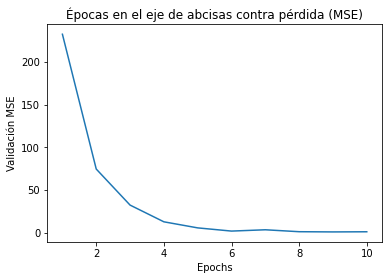

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.title('Épocas en el eje de abcisas contra pérdida (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

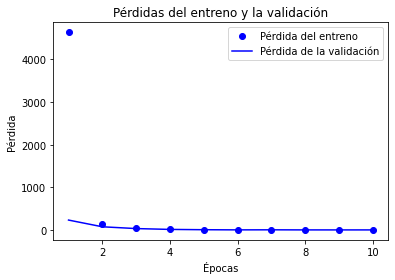

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Pérdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

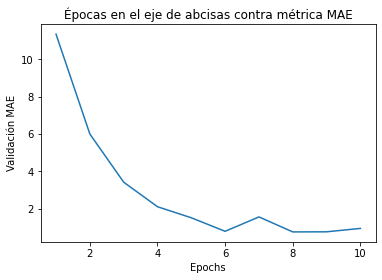

In [29]:
# 4. Confrontar en una gráfica de épocas en el eje de abcisas contra la métrica de 
# error absoluto medio (MAE) 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Épocas en el eje de abcisas contra métrica MAE')
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

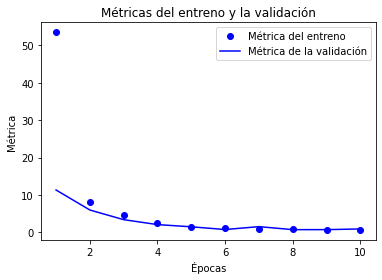

In [30]:
# Por último se realiza una gráfica para comparar el mae de entreno y validación

import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Métrica del entreno')
plt.plot(epochs, val_loss, 'b', label='Métrica de la validación')
plt.title('Métricas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Métrica')
plt.legend()

plt.show()

Con 10 épocas se observa que el modelo converge y se estabiliza en un momento muy temprano. Es por este motivo que se puede sospechar un funcionamiento extraño de la red, y por lo que se llevará a cabo una nueva prueba. Este nuevo modelo se constituirá por:
* epochs=10
* batch_size=1

In [43]:
model11 = models.Sequential()
model11.add(layers.Dense(64, activation='relu',
                       input_shape=(train_datos.shape[1],)))
model11.add(layers.Dense(64, activation='relu'))
model11.add(layers.Dense(1))
model11.compile(optimizer='rmsprop', loss='mse', 
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [44]:
# 1. Hacer aquí las particiones de los datos de entrenamiento
partial_train_datos = train_datos[:18000]
partial_eval_train_datos = train_datos[18001:]
partial_train_targets = train_targets[:18000]
partial_eval_train_targets = train_targets[18001:]

In [45]:
history = model11.fit(partial_train_datos, partial_train_targets,
            validation_data=(partial_eval_train_datos, partial_eval_train_targets),
                        epochs=10, batch_size=1)

Epoch 1/10
18000/18000 [==============================] - 58s 3ms/step - loss: 209.4191 - mean_absolute_error: 4.8640 - val_loss: 19.9448 - val_mean_absolute_error: 1.6429
Epoch 2/10
18000/18000 [==============================] - 62s 3ms/step - loss: 14.5637 - mean_absolute_error: 1.4119 - val_loss: 10.9723 - val_mean_absolute_error: 1.8699
Epoch 3/10
18000/18000 [==============================] - 57s 3ms/step - loss: 6.0410 - mean_absolute_error: 1.0955 - val_loss: 4.1760 - val_mean_absolute_error: 1.2096
Epoch 4/10
18000/18000 [==============================] - 47s 3ms/step - loss: 3.1481 - mean_absolute_error: 0.8924 - val_loss: 1.5324 - val_mean_absolute_error: 0.6451
Epoch 5/10
18000/18000 [==============================] - 47s 3ms/step - loss: 2.9244 - mean_absolute_error: 0.8047 - val_loss: 4.2683 - val_mean_absolute_error: 1.5465
Epoch 6/10
18000/18000 [==============================] - 45s 2ms/step - loss: 2.7550 - mean_absolute_error: 0.7624 - val_loss: 2.6154 - val_mean_abso

In [46]:
mae_history = history.history['val_mean_absolute_error']

In [47]:
mse_history = history.history['val_loss']


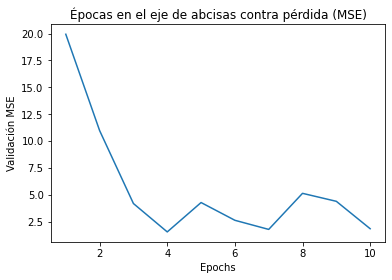

In [48]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.title('Épocas en el eje de abcisas contra pérdida (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

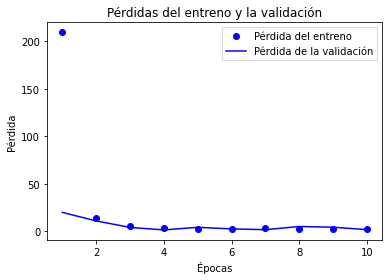

In [49]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Pérdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

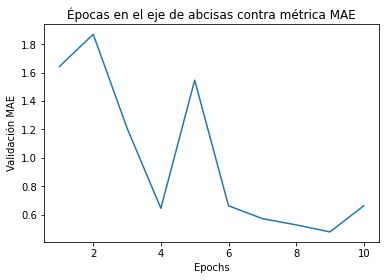

In [50]:
# 4. Confrontar en una gráfica de épocas en el eje de abcisas contra la métrica de 
# error absoluto medio (MAE) 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Épocas en el eje de abcisas contra métrica MAE')
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

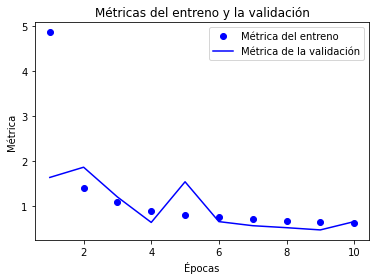

In [51]:
# Por último se realiza una gráfica para comparar el mae de entreno y validación

import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Métrica del entreno')
plt.plot(epochs, val_loss, 'b', label='Métrica de la validación')
plt.title('Métricas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Métrica')
plt.legend()

plt.show()

Cabe destacar que la diferencia que hay entre un batch_size de 1 con respecto a un batch_size de 64 radica en una preferencia por la precisión en el primer caso o la rapidez en el segundo. 

La diferencia significativa está en la Métrica MAE ya que la validación se separa en la época 5. Por lo restante no hemos encontrado diferencias significativas a parte del coste computacional.

## Validando nuestro enfoque usando la validación K-fold o K-iteraciones

A continuación se seguirá el método de K-folds como método de evaluación. 

Este método divide el set de datos en k grupos de la misma dimensión de forma que se van validando uno a uno en cada iteración cambiando de grupo los datos de entrenamiento con los de validación. 

El Final Score es la media de los diferentes scores de cada iteración.

In [52]:
import numpy as np

k = 4
num_val_samples = len(train_datos) // k 
print("num_val_samples", num_val_samples)
num_epochs = 20
all_scores = []
for i in range(k):
    print('processing fold #', i)
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_data = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
  # Construcción del modelo Keras (ya compilado)
    model3 = models.Sequential()
    model3.add(layers.Dense(64, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model3.add(layers.Dense(64, activation='relu'))
    model3.add(layers.Dense(1))
    model3.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    # Entrenando el modelo (en modo silencioso, verbose=0)
    history = model3.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=64, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 6250
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 6250 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 6250 : 25000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 6250 : 12500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 6250 ]U[ 12500 : 25000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 12500 : 18750 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 12500 ]U[ 18750 : 25000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 18750 : 25000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 18750 ]U[ 25000 : 25000 ]


In [53]:
all_scores

[0.5899962782859802,
 0.3290269076824188,
 0.9124293923377991,
 0.5326878428459167]

In [54]:
np.mean(all_scores)

0.5910351052880287

Vemos que los puntajes de validación son parecidos y que la media de estos es: 0.59. 

A continuación, entrenaremos el modelo con 100 iteraciones y lo graficaremos para ver los resultados. 

In [62]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [56]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición # k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de todas la demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_data = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model4 = models.Sequential()
    model4.add(layers.Dense(64, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model4.add(layers.Dense(64, activation='relu'))
    model4.add(layers.Dense(1))
    model4.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    # Entrenando el modelo (en modo silencioso, verbose=0)
    history = model4.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=64, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 6250 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 6250 : 25000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 6250 : 12500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 6250 ]U[ 12500 : 25000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 12500 : 18750 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 12500 ]U[ 18750 : 25000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 18750 : 25000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 18750 ]U[ 25000 : 25000 ]


In [57]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

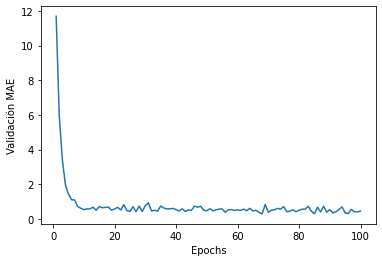

In [58]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

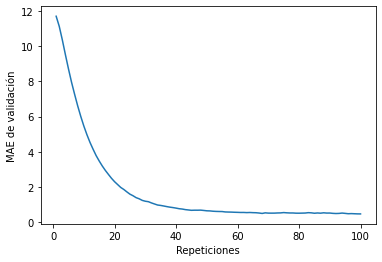

In [59]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[0:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

Según este gráfico, parece que el MAE de validación deja de mejorar significativamente después de 10 repeticiones. Pasado ese punto, comenzamos a sobreajustar.

Una vez terminado de ajustar otros parámetros de nuestro modelo (además del número de repeticiones, también podríamos ajustar el tamaño de las capas ocultas), podemos entrenar un modelo de "producción" final en todos los datos de entrenamiento, con los mejores parámetros, y luego observar su rendimiento en los datos de prueba:

In [60]:
# Obtenemos un modelo compilado nuevo 10 epoca pq hemos acordado que e slo mejpr, grafica
model5 = models.Sequential()
model5.add(layers.Dense(64, activation='relu',
                        input_shape=(train_datos.shape[1],)))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(1))
model5.compile(optimizer='rmsprop', loss='mse', 
              metrics=[tf.keras.metrics.MeanAbsoluteError()])
# Lo entrenamos en todos los datos.
model.fit(train_datos, train_targets,
          epochs=10, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_datos, test_targets)

353/353 [==============================] - 1s 2ms/step - loss: 0.6442 - mean_absolute_error: 0.6723


In [61]:
test_mae_score


0.6723129153251648

Todavía hay una desviación de alrededor de 0.67 dólares
En los modelos previos la precisión era parecida.

# HALLAZGOS

Se ha ido comentando las conclusiones a lo largo del código, las conclusiones que hemos obtenido son:

* El número de las épocas influye directamente en la decisión del modelo por lo comentado anteriormente. 

* En el modelo publicado por el profesor, pasaba algo parecido ya que a partir de la iteración 80 la precisión empeoraba. 

* En este caso, el protocolo de evaluación de k-folds ha resultado en 0.67 de desviación mientras que en los modelos anteriores, en concreto el útlimo con los hiperparámetros modificados a conveniencia de modelo, hemos obtenido 0.66. Por ello, concluimos que el método de K-Folds no es conveniente para este caso (normalmente se utilizan bases con pocos datos). 


Los resultados obtenidos discrepan con los obtenido en el documento del profesor, sin embargo, no han sido inesperados ya que los resultados no han sido extraños. 

# TRABAJO FUTURO

Como cualquier modelo, se puede buscar un Hiperparámetro/s que optimice los resultados. Por ejemplo, el uso de reguladores como dropout o modificación de los datos. 

No se podrían utilizar regularizadores L1, L2 y L1_L2 ya que no se tratan de imágenes. 

En cuanto a las aplicaciones tangibles, observamos claras utilidades en el sector servicio ya que se ha observado en la práctica acerca del precio de las casas. 

# REFERENCIAS BIBLIOGRÁFICAS